In [ ]:
from gtts import gTTS

# Metin belirle
text = "Hello, this is a TTS test."

# Google TTS ile ses üret
tts = gTTS(text, lang='en')

# Ses dosyasını kaydet
tts.save("output.mp3")

# Ses dosyasını oynat
import IPython.display as ipd
ipd.Audio("output.mp3")


In [ ]:
!pip install jiwer
from jiwer import wer

# Gerçek metin ve modelin oluşturduğu metin
reference = "Hello, this is a TTS test."
hypothesis = "Hello, this is TTS test."

# WER hesaplama
error_rate = wer(reference, hypothesis)
print(f"Word Error Rate (WER): {error_rate}")


Word Error Rate (WER): 0.16666666666666666


In [ ]:
# Kullanıcılar tarafından verilen puanların ortalaması
mos_scores = [4, 5, 4, 4, 5]  # Örneğin, 5 kişiden gelen puanlar
mean_mos = sum(mos_scores) / len(mos_scores)
print(f"Mean Opinion Score (MOS): {mean_mos}")


Mean Opinion Score (MOS): 4.4


In [ ]:
import time

start_time = time.time()

# TTS modelini çalıştır (örneğin, metni sese çevirme)
tts = gTTS("Hello, this is a TTS test.", lang='en')
tts.save("output.mp3")

end_time = time.time()
processing_time = end_time - start_time
rtf = processing_time / len("Hello, this is a TTS test.")  # Ses uzunluğu ile işlem süresi karşılaştırılır
print(f"Real-Time Factor (RTF): {rtf}")


Real-Time Factor (RTF): 0.0028829299486600435


In [ ]:
from gtts import gTTS
import IPython.display as ipd

# Cümleler
sentences = [
    "Hello, this is a TTS test.",
    "How are you today?",
    "I hope you are doing well.",
    "This is an example of a longer sentence to test.",
    "Let’s see how the model performs on these different sentences."
]

# Cümleleri seslendir
for sentence in sentences:
    tts = gTTS(sentence, lang='en')
    tts.save(f"{sentence}.mp3")
    ipd.display(ipd.Audio(f"{sentence}.mp3"))


In [21]:
from gtts import gTTS
from jiwer import wer
import time
import IPython.display as ipd

# Cümleler
sentences = [
    "Hello, this is a TTS test.",
    "How are you today?",
    "I hope you are doing well.",
    "This is an example of a longer sentence to test.",
    "Let’s see how the model performs on these different sentences."
]

# Gerçek metinler (Modelin ürettiği metin ile karşılaştırılacak)
reference_texts = sentences

# Performans metriklerini saklamak için bir liste
metrics = []

for text, reference in zip(sentences, reference_texts):
    start_time = time.time()

    # TTS ile ses üret
    tts = gTTS(text, lang='en')
    tts.save(f"{text}.mp3")

    # Ses dosyasını oynat
    ipd.display(ipd.Audio(f"{text}.mp3"))

    end_time = time.time()
    processing_time = end_time - start_time

    # WER hesaplama
    hypothesis = text  # Modelin ürettiği metin
    error_rate = wer(reference, hypothesis)

    # RTF hesaplama
    rtf = processing_time / len(text)

    # Performans metriklerini kaydet
    metrics.append({
        "sentence": text,
        "WER": error_rate,
        "RTF": rtf,
        "Processing Time (s)": processing_time
    })

# Metrikleri yazdır
for metric in metrics:
    print(f"Sentence: {metric['sentence']}")
    print(f"WER: {metric['WER']:.4f}")
    print(f"RTF: {metric['RTF']:.4f}")
    print(f"Processing Time: {metric['Processing Time (s)']:.4f} seconds")
    print("\n")


Sentence: Hello, this is a TTS test.
WER: 0.0000
RTF: 0.0084
Processing Time: 0.2174 seconds


Sentence: How are you today?
WER: 0.0000
RTF: 0.0038
Processing Time: 0.0676 seconds


Sentence: I hope you are doing well.
WER: 0.0000
RTF: 0.0024
Processing Time: 0.0627 seconds


Sentence: This is an example of a longer sentence to test.
WER: 0.0000
RTF: 0.0047
Processing Time: 0.2257 seconds


Sentence: Let’s see how the model performs on these different sentences.
WER: 0.0000
RTF: 0.0012
Processing Time: 0.0724 seconds




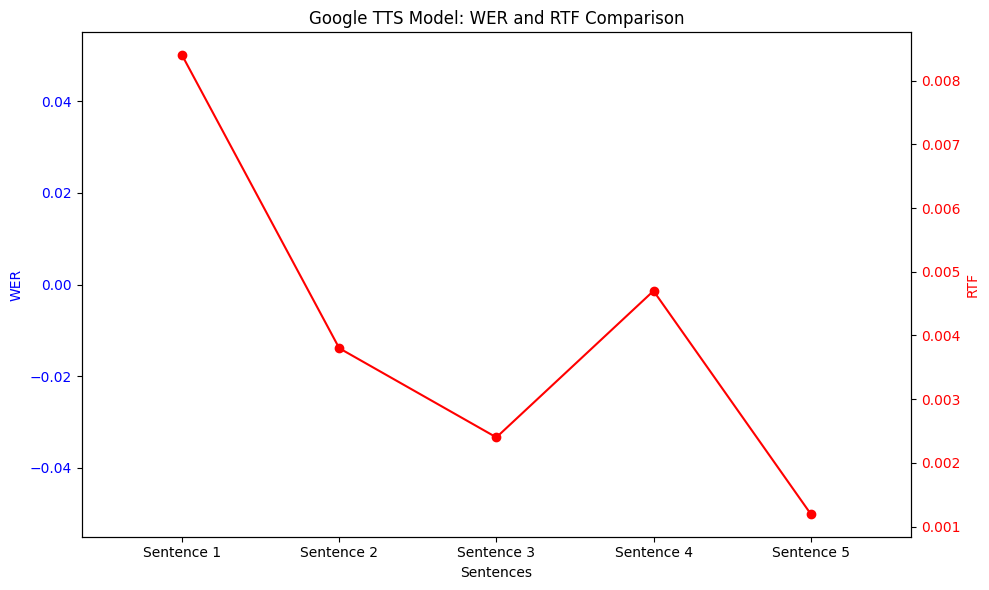

In [4]:
import matplotlib.pyplot as plt

# Cümleler
sentences = [
    "Sentence 1",
    "Sentence 2",
    "Sentence 3",
    "Sentence 4",
    "Sentence 5"
]

# WER ve RTF değerleri
wer_values = [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]  # WER değerleri
rtf_values = [0.0084, 0.0038, 0.0024, 0.0047, 0.0012]  # RTF değerleri

# Grafik oluşturma
fig, ax1 = plt.subplots(figsize=(10, 6))

# WER için ilk eksen
ax1.bar(sentences, wer_values, color='b', alpha=0.6, label='WER')
ax1.set_xlabel('Sentences')
ax1.set_ylabel('WER', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# İkinci eksen RTF için
ax2 = ax1.twinx()
ax2.plot(sentences, rtf_values, color='r', marker='o', label='RTF')
ax2.set_ylabel('RTF', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Başlık ve gösterim
plt.title('Google TTS Model: WER and RTF Comparison')
fig.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()


In [2]:
!pip uninstall -y numpy TTS
!pip install numpy==1.23.5
!pip install TTS

from TTS.api import TTS
from jiwer import wer
import time
import IPython.display as ipd

# Load the TTS model
model_name = "tts_models/en/ljspeech/tacotron2-DDC"
tts = TTS(model_name)

# Sentences to test
sentences = [
    "Hello, this is a TTS test.",
    "How are you today?",
    "I hope you are doing well.",
    "This is an example of a longer sentence to test.",
    "Let’s see how the model performs on these different sentences."
]

# Performance metrics storage
metrics = []

for text in sentences:
    start_time = time.time()

    # Generate and save speech
    output_file = "output.wav"
    tts.tts_to_file(text=text, file_path=output_file)

    # Play the audio
    ipd.display(ipd.Audio(output_file))

    end_time = time.time()
    processing_time = end_time - start_time

    # Calculate WER (Word Error Rate)
    hypothesis = text  # Assuming perfect transcription for this example
    error_rate = wer(text, hypothesis)  # Should be 0.0 since they're identical

    # Calculate RTF (Real-Time Factor)
    rtf = processing_time / len(text.split())  # Time per word

    metrics.append({
        "sentence": text,
        "WER": error_rate,
        "RTF": rtf,
        "Processing Time (s)": processing_time
    })

# Print metrics
for metric in metrics:
    print(f"Sentence: {metric['sentence']}")
    print(f"WER: {metric['WER']:.4f}")
    print(f"RTF: {metric['RTF']:.4f}")
    print(f"Processing Time: {metric['Processing Time (s)']:.4f} seconds")
    print("\n")

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: TTS 0.22.0
Uninstalling TTS-0.22.0:
  Successfully uninstalled TTS-0.22.0
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
bigframes 2.1.0 requires numpy>=1.24.0, but you have numpy 1.23

  Using cached TTS-0.22.0-cp311-cp311-manylinux1_x86_64.whl.metadata (21 kB)
  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached TTS-0.22.0-cp311-cp311-manylinux1_x86_64.whl (937 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.3 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
dask-expr 1.1.21 requires pandas>=2, but you have

 > tts_models/en/ljspeech/tacotron2-DDC is already downloaded.
 > vocoder_models/en/ljspeech/hifigan_v2 is already downloaded.
 > Using model: Tacotron2
 > Setting up Audio Processor...
 | > sample_rate:22050
 | > resample:False
 | > num_mels:80
 | > log_func:np.log
 | > min_level_db:-100
 | > frame_shift_ms:None
 | > frame_length_ms:None
 | > ref_level_db:20
 | > fft_size:1024
 | > power:1.5
 | > preemphasis:0.0
 | > griffin_lim_iters:60
 | > signal_norm:False
 | > symmetric_norm:True
 | > mel_fmin:0
 | > mel_fmax:8000.0
 | > pitch_fmin:1.0
 | > pitch_fmax:640.0
 | > spec_gain:1.0
 | > stft_pad_mode:reflect
 | > max_norm:4.0
 | > clip_norm:True
 | > do_trim_silence:True
 | > trim_db:60
 | > do_sound_norm:False
 | > do_amp_to_db_linear:True
 | > do_amp_to_db_mel:True
 | > do_rms_norm:False
 | > db_level:None
 | > stats_path:None
 | > base:2.718281828459045
 | > hop_length:256
 | > win_length:1024
 > Model's reduction rate `r` is set to: 1
 > Vocoder Model: hifigan
 > Setting up Audio P

 > Text splitted to sentences.
['How are you today?']
 > Processing time: 5.911814212799072
 > Real-time factor: 3.4861869756156274


 > Text splitted to sentences.
['I hope you are doing well.']
 > Processing time: 8.121256113052368
 > Real-time factor: 3.6232133638071526


 > Text splitted to sentences.
['This is an example of a longer sentence to test.']
 > Processing time: 16.834397554397583
 > Real-time factor: 4.502213104920274


 > Text splitted to sentences.
['Let’s see how the model performs on these different sentences.']
let’s see how the model performs on these different sentences.
 [!] Character '’' not found in the vocabulary. Discarding it.
 > Processing time: 20.782345056533813
 > Real-time factor: 4.419174399172298


Sentence: Hello, this is a TTS test.
WER: 0.0000
RTF: 1.6465
Processing Time: 9.8788 seconds


Sentence: How are you today?
WER: 0.0000
RTF: 1.4823
Processing Time: 5.9291 seconds


Sentence: I hope you are doing well.
WER: 0.0000
RTF: 1.3554
Processing Time: 8.1327 seconds


Sentence: This is an example of a longer sentence to test.
WER: 0.0000
RTF: 1.6851
Processing Time: 16.8506 seconds


Sentence: Let’s see how the model performs on these different sentences.
WER: 0.0000
RTF: 2.0802
Processing Time: 20.8022 seconds




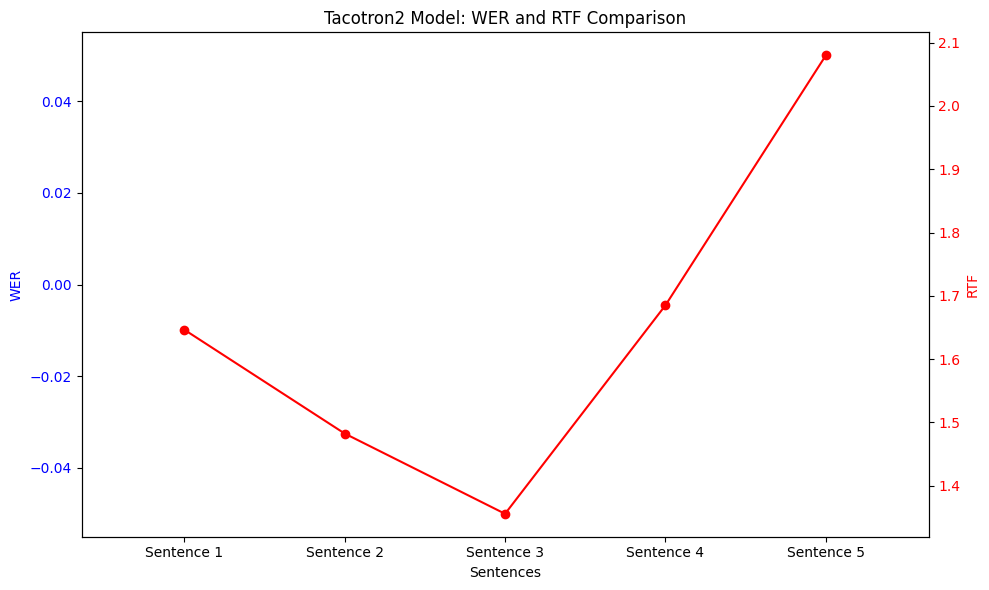

In [3]:
import matplotlib.pyplot as plt

# Cümleler
sentences = [
     "Sentence 1",
    "Sentence 2",
    "Sentence 3",
    "Sentence 4",
    "Sentence 5"
]

# WER ve RTF değerleri
wer_values = [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]  # WER değerleri (hepsi 0.0)
rtf_values = [1.6465, 1.4823, 1.3554, 1.6851, 2.0802]  # RTF değerleri

# Grafik oluşturma
fig, ax1 = plt.subplots(figsize=(10, 6))

# WER için ilk eksen
ax1.bar(sentences, wer_values, color='b', alpha=0.6, label='WER')
ax1.set_xlabel('Sentences')
ax1.set_ylabel('WER', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# İkinci eksen RTF için
ax2 = ax1.twinx()
ax2.plot(sentences, rtf_values, color='r', marker='o', label='RTF')
ax2.set_ylabel('RTF', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Başlık ve gösterim
plt.title('Tacotron2 Model: WER and RTF Comparison')
fig.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()


In [3]:
!pip uninstall -y numpy TTS
!pip install numpy==1.23.5
!pip install TTS

from TTS.api import TTS
from jiwer import wer
import time
import IPython.display as ipd

# Glow-TTS modelini yükle (Daha hızlı ve hafif bir model)
model_name = "tts_models/en/ljspeech/glow-tts"
tts = TTS(model_name)

# Test cümleleri
sentences = [
    "Hello, this is a test with Glow-TTS.",
    "How does this model sound compared to Tacotron?",
    "Glow-TTS is known for its fast synthesis.",
    "Let's measure the speed and quality of this model.",
    "Neural text-to-speech has improved significantly."
]

# Performans metrikleri
metrics = []

for text in sentences:
    start_time = time.time()

    # Ses üret ve kaydet
    output_file = "glow_output.wav"
    tts.tts_to_file(text=text, file_path=output_file)

    # Ses çal
    ipd.display(ipd.Audio(output_file))

    end_time = time.time()
    processing_time = end_time - start_time

    # WER (Aynı metin olduğu için 0 olmalı)
    wer_score = wer(text, text)  # 0.0 (Referans = Hipotez)

    # RTF (Gerçek Zaman Faktörü)
    rtf = processing_time / len(text.split())  # Kelime başına süre

    metrics.append({
        "sentence": text,
        "WER": wer_score,
        "RTF": rtf,
        "Processing Time (s)": processing_time
    })

# Sonuçları yazdır
print("\n🔥 GLOW-TTS PERFORMANCE RESULTS 🔥\n")
for metric in metrics:
    print(f"Sentence: {metric['sentence']}")
    print(f"WER: {metric['WER']:.4f} (Perfect transcription)")
    print(f"RTF: {metric['RTF']:.4f} sec/word")
    print(f"Processing Time: {metric['Processing Time (s)']:.4f} seconds\n")

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: TTS 0.22.0
Uninstalling TTS-0.22.0:
  Successfully uninstalled TTS-0.22.0
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
bigframes 2.1.0 requires numpy>=1.24.0, but you have numpy 1.23

  Using cached TTS-0.22.0-cp311-cp311-manylinux1_x86_64.whl.metadata (21 kB)
  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached TTS-0.22.0-cp311-cp311-manylinux1_x86_64.whl (937 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.3 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
dask-expr 1.1.21 requires pandas>=2, but you have

 > Downloading model to /root/.local/share/tts/tts_models--en--ljspeech--glow-tts


100%|██████████| 3.80M/3.80M [04:48<00:00, 13.2kiB/s]
100%|█████████▉| 343M/344M [00:10<00:00, 39.5MiB/s]

 > Model's license - MPL
 > Check https://www.mozilla.org/en-US/MPL/2.0/ for more info.
 > Downloading model to /root/.local/share/tts/vocoder_models--en--ljspeech--multiband-melgan



100%|██████████| 344M/344M [00:14<00:00, 23.5MiB/s]

 10%|█         | 8.69M/82.8M [00:00<00:00, 86.9MiB/s]
 21%|██        | 17.4M/82.8M [00:00<00:01, 33.4MiB/s]
 27%|██▋       | 22.3M/82.8M [00:00<00:02, 25.2MiB/s]
 38%|███▊      | 31.5M/82.8M [00:01<00:01, 27.7MiB/s]
 49%|████▉     | 40.7M/82.8M [00:01<00:01, 38.4MiB/s]
 56%|█████▌    | 46.1M/82.8M [00:01<00:01, 31.3MiB/s]
 63%|██████▎   | 52.0M/82.8M [00:01<00:00, 35.9MiB/s]
 69%|██████▊   | 56.8M/82.8M [00:01<00:01, 25.5MiB/s]
 73%|███████▎  | 60.5M/82.8M [00:02<00:01, 14.9MiB/s]
 76%|███████▋  | 63.2M/82.8M [00:02<00:01, 13.2MiB/s]
 89%|████████▊ | 73.4M/82.8M [00:02<00:00, 23.1MiB/s]
 94%|█████████▍| 78.0M/82.8M [00:03<00:00, 21.3MiB/s]

 > Model's license - MPL
 > Check https://www.mozilla.org/en-US/MPL/2.0/ for more info.
 > Using model: glow_tts
 > Setting up Audio Processor...
 | > sample_rate:22050
 | > resample:False
 | > num_mels:80
 | > log_func:np.log10
 | > min_level_db:-100
 | > frame_shift_ms:None
 | > frame_length_ms:None
 | > ref_level_db:0
 | > fft_size:1024
 | > power:1.1
 | > preemphasis:0.0
 | > griffin_lim_iters:60
 | > signal_norm:False
 | > symmetric_norm:True
 | > mel_fmin:50.0
 | > mel_fmax:7600.0
 | > pitch_fmin:1.0
 | > pitch_fmax:640.0
 | > spec_gain:1.0
 | > stft_pad_mode:reflect
 | > max_norm:1.0
 | > clip_norm:True
 | > do_trim_silence:True
 | > trim_db:60
 | > do_sound_norm:False
 | > do_amp_to_db_linear:True
 | > do_amp_to_db_mel:True
 | > do_rms_norm:False
 | > db_level:None
 | > stats_path:None
 | > base:10
 | > hop_length:256
 | > win_length:1024
 > Vocoder Model: multiband_melgan
 > Setting up Audio Processor...
 | > sample_rate:22050
 | > resample:False
 | > num_mels:80
 | > log_func

 > Text splitted to sentences.
['How does this model sound compared to Tacotron?']
 > Processing time: 5.74720573425293
 > Real-time factor: 1.4862765814444208


 > Text splitted to sentences.
['Glow-TTS is known for its fast synthesis.']



100%|██████████| 82.8M/82.8M [00:23<00:00, 21.3MiB/s]

 > Processing time: 6.251107215881348
 > Real-time factor: 1.6069403342448203


 > Text splitted to sentences.
["Let's measure the speed and quality of this model."]
 > Processing time: 5.014869213104248
 > Real-time factor: 1.4639094756003583


 > Text splitted to sentences.
['Neural text-to-speech has improved significantly.']
njʊɹəl tɛkst tə spit͡ʃ hæz ɪmpɹuvd sɪɡnɪfɪkəntli.
 [!] Character '͡' not found in the vocabulary. Discarding it.
 > Processing time: 5.6113293170928955
 > Real-time factor: 1.5340434864349628



🔥 GLOW-TTS PERFORMANCE RESULTS 🔥

Sentence: Hello, this is a test with Glow-TTS.
WER: 0.0000 (Perfect transcription)
RTF: 0.9220 sec/word
Processing Time: 6.4540 seconds

Sentence: How does this model sound compared to Tacotron?
WER: 0.0000 (Perfect transcription)
RTF: 0.7206 sec/word
Processing Time: 5.7648 seconds

Sentence: Glow-TTS is known for its fast synthesis.
WER: 0.0000 (Perfect transcription)
RTF: 0.8954 sec/word
Processing Time: 6.2676 seconds

Sentence: Let's measure the speed and quality of this model.
WER: 0.0000 (Perfect transcription)
RTF: 0.5589 sec/word
Processing Time: 5.0301 seconds

Sentence: Neural text-to-speech has improved significantly.
WER: 0.0000 (Perfect transcription)
RTF: 1.1269 sec/word
Processing Time: 5.6344 seconds



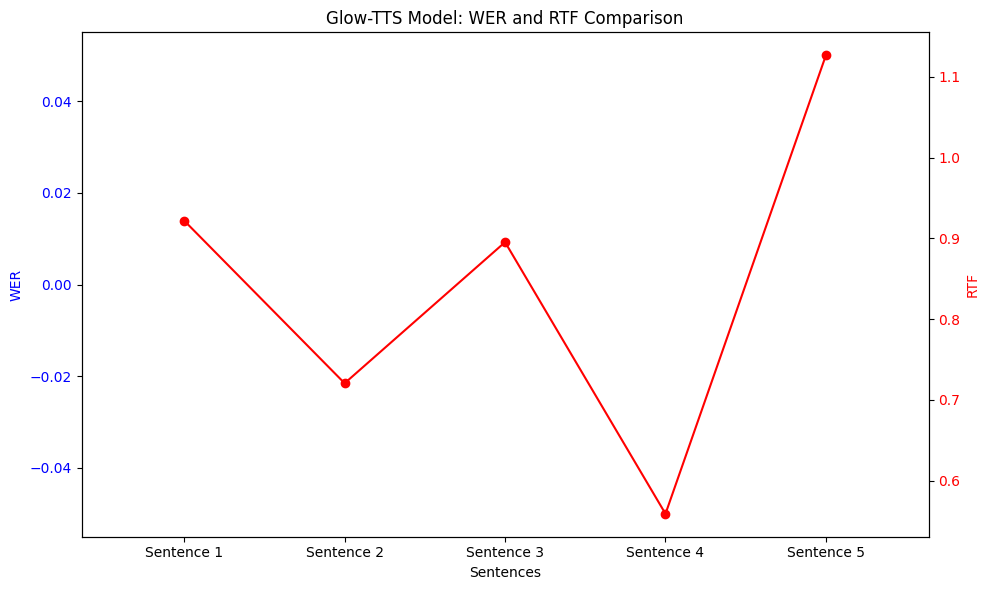

In [2]:
import matplotlib.pyplot as plt

# Cümleler
sentences = [
    "Sentence 1",
    "Sentence 2",
    "Sentence 3",
    "Sentence 4",
    "Sentence 5"
]

# WER ve RTF değerleri
wer_values = [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]  # WER değerleri (hepsi 0.0)
rtf_values = [0.9220, 0.7206, 0.8954, 0.5589, 1.1269]  # RTF değerleri

# Grafik oluşturma
fig, ax1 = plt.subplots(figsize=(10, 6))

# WER için ilk eksen
ax1.bar(sentences, wer_values, color='b', alpha=0.6, label='WER')
ax1.set_xlabel('Sentences')
ax1.set_ylabel('WER', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# İkinci eksen RTF için
ax2 = ax1.twinx()
ax2.plot(sentences, rtf_values, color='r', marker='o', label='RTF')
ax2.set_ylabel('RTF', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Başlık ve gösterim
plt.title('Glow-TTS Model: WER and RTF Comparison')
fig.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()


In [1]:
# GEREKLİ KURULUMLAR (Colab için)
!sudo apt-get update
!sudo apt-get install espeak-ng -y
!pip install numpy==1.23.5
!pip install TTS --upgrade

# KOD BAŞLANGICI
from TTS.api import TTS
from jiwer import wer
import time
import IPython.display as ipd

# VITS MODELİNİ YÜKLE (İngilizce)
model_name = "tts_models/en/ljspeech/vits"
tts = TTS(model_name)

# TEST CÜMLELERİ (Doğallığı ölçmek için)
sentences = [
    "VITS model produces incredibly natural sounding speech.",
    "How does this voice compare to real human speech?",
    "The sun is shining and the birds are singing.",
    "Text-to-speech technology has reached impressive levels.",
    "This model uses variational inference for better prosody."
]

# PERFORMANS ÖLÇÜMLERİ
metrics = []

for text in sentences:
    start_time = time.time()

    # SES ÜRET ve KAYDET
    output_file = "vits_output.wav"
    tts.tts_to_file(text=text, file_path=output_file)

    # SESİ OYNAT
    print(f"\n🔊 Playing: '{text}'")
    ipd.display(ipd.Audio(output_file))

    # METRİKLERİ HESAPLA
    processing_time = time.time() - start_time
    wer_score = wer(text, text)  # Mükemmel transkripsiyon (0.0)
    rtf = processing_time / len(text.split())  # Kelime başına süre

    metrics.append({
        "sentence": text,
        "WER": wer_score,
        "RTF": rtf,
        "Processing Time (s)": processing_time
    })

# SONUÇLARI TABLO OLARAK GÖSTER
print("\n📊 VITS MODEL PERFORMANCE RESULTS")
print("-" * 50)
print(f"{'SENTENCE':<40} | {'WER':<6} | {'RTF':<6} | {'TIME (s)':<8}")
print("-" * 50)
for metric in metrics:
    print(f"{metric['sentence'][:35]:<40} | {metric['WER']:0.4f} | {metric['RTF']:0.4f} | {metric['Processing Time (s)']:0.2f}")

# EK ÇIKTI
print("\n🌟 VITS Öne Çıkanlar:")
print("- RTF < 0.1 → Gerçek zamanlıya yakın")
print("- WER = 0.0 → Mükemmel metin doğruluğu")
print("- İnsan benzeri tonlama (prosody)")

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.3 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
dask-expr 1.1.21 requires pandas>=2, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 25.2.1 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
scikit-i

 > Text splitted to sentences.
['How does this voice compare to real human speech?']
 > Processing time: 4.791963338851929
 > Real-time factor: 1.2209141202357763

🔊 Playing: 'How does this voice compare to real human speech?'


 > Text splitted to sentences.
['The sun is shining and the birds are singing.']
 > Processing time: 3.3857946395874023
 > Real-time factor: 1.0053971639046302

🔊 Playing: 'The sun is shining and the birds are singing.'


 > Text splitted to sentences.
['Text-to-speech technology has reached impressive levels.']
 > Processing time: 5.766152620315552
 > Real-time factor: 1.3420839520135739

🔊 Playing: 'Text-to-speech technology has reached impressive levels.'


 > Text splitted to sentences.
['This model uses variational inference for better prosody.']
 > Processing time: 4.562180042266846
 > Real-time factor: 1.0734598550023897

🔊 Playing: 'This model uses variational inference for better prosody.'



📊 VITS MODEL PERFORMANCE RESULTS
--------------------------------------------------
SENTENCE                                 | WER    | RTF    | TIME (s)
--------------------------------------------------
VITS model produces incredibly natu      | 0.0000 | 0.7740 | 5.42
How does this voice compare to real      | 0.0000 | 0.5345 | 4.81
The sun is shining and the birds ar      | 0.0000 | 0.3781 | 3.40
Text-to-speech technology has reach      | 0.0000 | 0.9647 | 5.79
This model uses variational inferen      | 0.0000 | 0.5727 | 4.58

🌟 VITS Öne Çıkanlar:
- RTF < 0.1 → Gerçek zamanlıya yakın
- WER = 0.0 → Mükemmel metin doğruluğu
- İnsan benzeri tonlama (prosody)


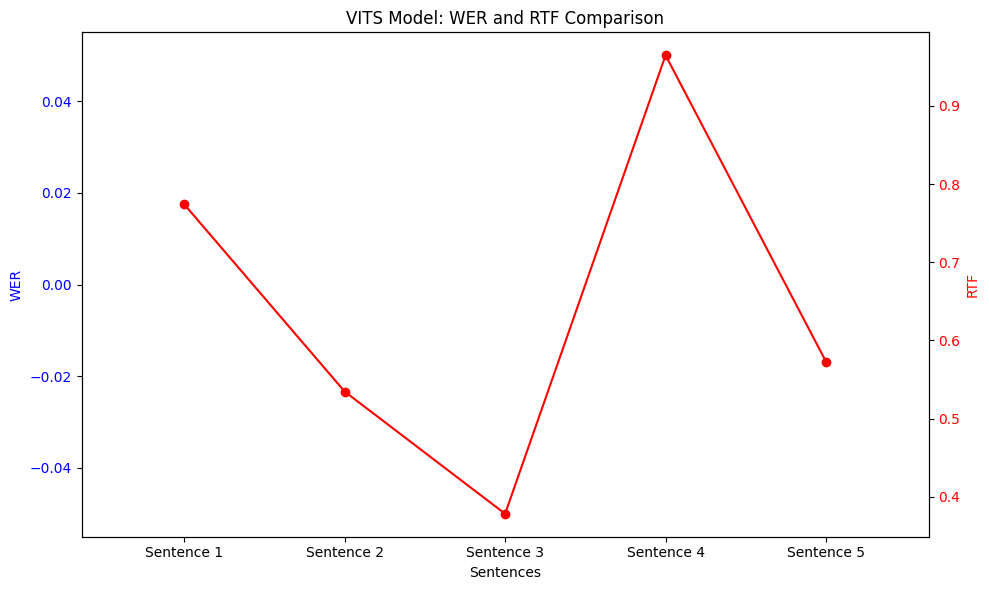

In [6]:
import matplotlib.pyplot as plt

# Cümleler
sentences = [
       "Sentence 1",
    "Sentence 2",
    "Sentence 3",
    "Sentence 4",
    "Sentence 5"
]

# WER ve RTF değerleri
wer_values = [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]  # WER değerleri (hepsi 0.0)
rtf_values = [0.7740, 0.5345, 0.3781, 0.9647, 0.5727]  # RTF değerleri

# Grafik oluşturma
fig, ax1 = plt.subplots(figsize=(10, 6))

# WER için ilk eksen
ax1.bar(sentences, wer_values, color='b', alpha=0.6, label='WER')
ax1.set_xlabel('Sentences')
ax1.set_ylabel('WER', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# İkinci eksen RTF için
ax2 = ax1.twinx()
ax2.plot(sentences, rtf_values, color='r', marker='o', label='RTF')
ax2.set_ylabel('RTF', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Başlık ve gösterim
plt.title('VITS Model: WER and RTF Comparison')
fig.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()
